In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
FREQUENCY = 0.2
K = 10
attempts = 10


for m in range(10, 18):
  mask = cv2.imread("/content/drive/MyDrive/video/" + str(m) + ".png")

  print(mask)

  d = defaultdict(int)

  # # count elements
  # for row in mask:
  #   for element in row:
  #     d[element] += 1

  # # get frequency
  # for k, v in d.items():
  #   d[k] = v/(len(mask)*len(mask[0]))

  # # sorted
  # d = sorted(d.items(), key=lambda k_v: k_v[1], reverse=True)

  print(dict(d))


None
{}
None
{}
None
{}
None
{}
None
{}
None
{}
None
{}
None
{}


In [4]:
def k_read(img, clusters, show):

  # read the image
  image = cv2.imread(img)

  # convert to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = image.reshape((-1, 3))

  # convert to float
  pixel_values = np.float32(pixel_values)

  # define stopping criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  # number of clusters (k)
  k = clusters
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # convert back to 8 bit values
  centers = np.uint8(centers)

  # flatten the labels array
  labels = labels.flatten()

  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]

  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image.shape)

  if (show == 1):
    # show the image
    plt.imshow(segmented_image)
    plt.show()


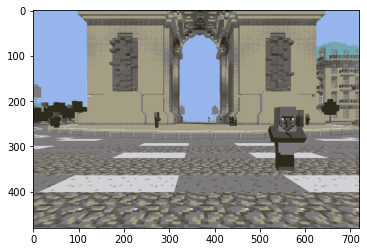

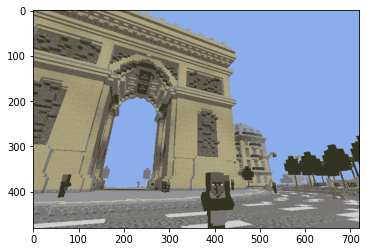

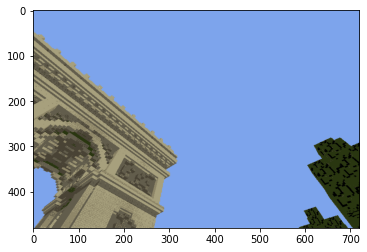

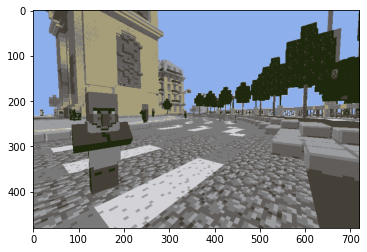

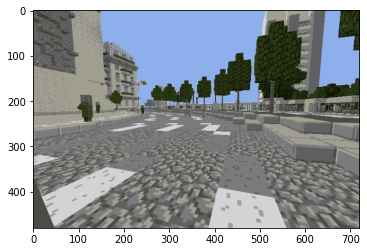

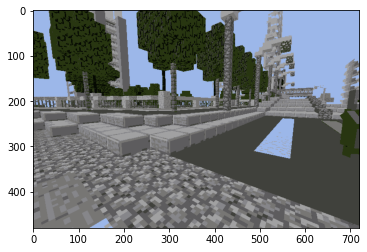

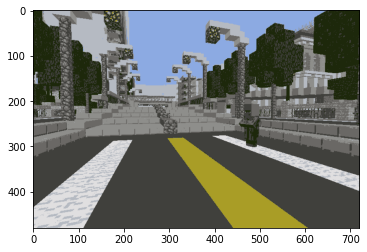

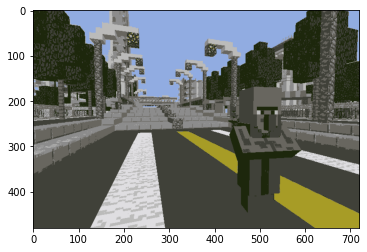

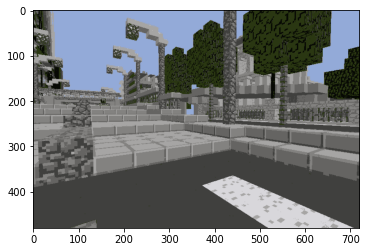

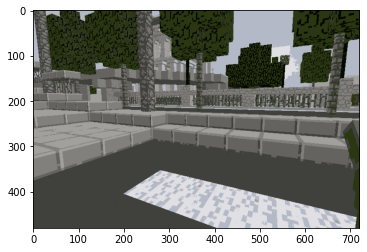

In [5]:
for m in range(0, 10):
  k_read("/content/drive/MyDrive/video/" + str(m) + ".png", 8, 1)

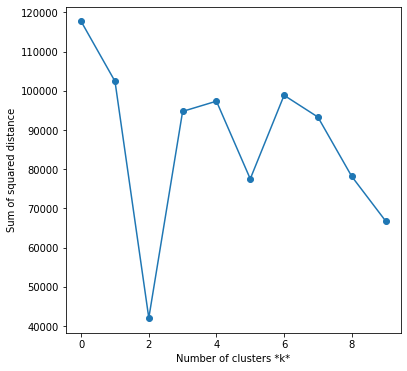

In [13]:
# Elbow Method 
# chooses k based on sum of squared distances (SSE) between data point and cluster centroid

k = 5

sse = []
for m in range(0, 10):

  image = cv2.imread("/content/drive/MyDrive/video/" + str(m) + ".png")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  pixel_values = image.reshape((-1, 3))
  pixel_values = np.float32(pixel_values)

  km = KMeans(n_clusters=k)
  X_std = StandardScaler().fit_transform(pixel_values)
  km.fit(X_std)
  sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(range(0, 10), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


error: ignored